In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv("/Users/kanmaniramasamy/Documents/HopeAI_Tamil/week10_ML_DatascienceAssignment_Capstone_project/heart.csv")

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Separation of Quan and Qual columns...

In [6]:
# Function to find quan and qual data
def QuanQual(dataset):
    quan=[]
    qual=[]
    for column_name in dataset.columns:
        if dataset[column_name].dtype=="object":
            qual.append(column_name)
        else:
            quan.append(column_name)
    return quan,qual

In [7]:
quan, qual = QuanQual(dataset)
quan

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [8]:
quan_table = pd.DataFrame(index=["Mean","Median","Mode", "min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%"],columns=quan)


In [9]:
quan_table

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1:25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2:50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3:75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4:100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Acces the row
#quan_table.loc[['Mean','Mode'],['Age','HeartDisease']]
#quan_table.loc['Mean','Age']

## Finding mean, median, mode, min, percentiles and max...

In [11]:
# "loc" to access the rows in the dataframe

### When there is more than one mode in a column, mode() returns multiple rows representing the different modes. 
#######Adding [0] means selecting the first mode (if there are multiple) from the output.

for quan_columnName in quan_table.columns:
    quan_table.loc[ ['Mean'],[ quan_columnName ]]= dataset[quan_columnName].mean()
    quan_table.loc[ ['Median'],[ quan_columnName] ] = dataset[quan_columnName].median()
    quan_table.loc[ ['Mode'],[ quan_columnName] ] = dataset[quan_columnName].mode()[0]   
    quan_table.loc[ ["min"],[quan_columnName] ] = dataset[quan_columnName].min() 
    
    # getting the percentiles from dataset.describe table
    quan_table.loc[["Q1:25%"],[quan_columnName] ] =dataset.describe()[quan_columnName]["25%"]
    quan_table.loc[["Q2:50%"],[quan_columnName]]=dataset.describe()[quan_columnName]["50%"]
    quan_table.loc[["Q3:75%"],[quan_columnName]]=dataset.describe()[quan_columnName]["75%"]
    
    quan_table.loc[["Q4:100%"],[quan_columnName]]=dataset[quan_columnName].max()
    

In [12]:
quan_table

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
Median,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Mode,54,120,0,0,150,0.0,1
min,28,0,0,0,60,-2.6,0
Q1:25%,47.0,120.0,173.25,0.0,120.0,0.0,0.0
Q2:50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Q3:75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
Q4:100%,77,200,603,1,202,6.2,1


## ### Finding Outliers: IQR (InterQuartileRange, 1.5 Rule, Lesser ,Smaller, max)

In [13]:
### Finding Outliers: IQR (InterQuartileRange, 1.5 Rule, Lesser outliers, smaller outliers, max)

# "loc" to access the rows in the dataframe
### When there is more than one mode in a column, mode() returns multiple rows representing the different modes. 
#######Adding [0] means selecting the first mode (if there are multiple) from the output.


quan_table= pd.DataFrame(index=["Mean","Median","Mode", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", 
                                   "1.5 Rule", "Lesser", "Greater","Max"],columns=quan)

for quan_columnName in quan_table.columns:
    quan_table.loc[ 'Mean', quan_columnName ]= dataset[quan_columnName].mean()
    quan_table.loc[ 'Median' , quan_columnName ] = dataset[quan_columnName].median()
    quan_table.loc[ 'Mode', quan_columnName ] = dataset[quan_columnName].mode()[0]   
    quan_table.loc[ "Min",quan_columnName ] = dataset[quan_columnName].min() 
    
    # getting the percentiles from dataset.describe table
    quan_table.loc[ "Q1:25%" , quan_columnName ] = dataset.describe()[quan_columnName]["25%"]
    quan_table.loc[ "Q2:50%" , quan_columnName ]= dataset.describe()[quan_columnName]["50%"]
    quan_table.loc[ "Q3:75%" , quan_columnName ]= dataset.describe()[quan_columnName]["75%"]
    quan_table.loc[ "Q4:100%" , quan_columnName ]= dataset[quan_columnName].max()

    # Finding IQR 
    quan_table.loc["IQR", quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ]- quan_table.loc[ "Q1:25%", quan_columnName ] 
    quan_table.loc["1.5 Rule", quan_columnName] = 1.5 * quan_table.loc["IQR", quan_columnName]
    quan_table.loc["Lesser" , quan_columnName] = quan_table.loc[ "Q1:25%" , quan_columnName ] - quan_table.loc["1.5 Rule", quan_columnName]
    quan_table.loc["Greater",quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ] + quan_table.loc["1.5 Rule", quan_columnName]

    quan_table.loc["Max",quan_columnName] = dataset[quan_columnName].max()
quan_table

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
Median,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Mode,54,120,0,0,150,0.0,1
Min,28,0,0,0,60,-2.6,0
Q1:25%,47.0,120.0,173.25,0.0,120.0,0.0,0.0
Q2:50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Q3:75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
Q4:100%,77,200,603,1,202,6.2,1
IQR,13.0,20.0,93.75,0.0,36.0,1.5,1.0
1.5 Rule,19.5,30.0,140.625,0.0,54.0,2.25,1.5


## Function for finding outliers

In [14]:
def finding_outliers(quan):
    lesser=[]
    greater= []
    for quan_columnName in quan:
        if quan_table.loc["Min",quan_columnName] < quan_table.loc["Lesser", quan_columnName]:
            lesser.append(quan_columnName)
        if quan_table.loc["Max", quan_columnName] > quan_table.loc["Greater", quan_columnName]:
            greater.append(quan_columnName)

    print("Lesser outlier resides in these columns: ", lesser)
    print("Greater outlier resides in these columns : ", greater)
    return lesser, greater

In [15]:
lesser, greater=finding_outliers(quan)

Lesser outlier resides in these columns:  ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Greater outlier resides in these columns :  ['RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak']


##  Function to replce the Outliers with Range in the original dataset...

In [16]:
# function to replace the outliers with the "Range" in the original dataset...

def outlier_replacement(dataset, quan_table, lesser, greater):
    for columnName in lesser:
        dataset.loc[ dataset[columnName]< quan_table.loc["Lesser", columnName], columnName]= quan_table.loc["Lesser", columnName]
    for columnName in greater:
        dataset.loc[ dataset[columnName] > quan_table.loc["Greater", columnName], columnName] = quan_table.loc["Greater", columnName]
    return lesser, greater
    

In [17]:
 lesser, greater=outlier_replacement(dataset, quan_table, lesser, greater)

lesser, greater

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_30557/3630552635.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[ dataset[columnName]< quan_table.loc["Lesser", columnName], columnName]= quan_table.loc["Lesser", columnName]


(['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
 ['RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak'])

## Recheck if any outliers...

In [18]:
# rerun the univariate after replacing the outlier with the range

quan_table= pd.DataFrame(index=["Mean","Median","Mode", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", 
                                   "1.5 Rule", "Lesser", "Greater","Max"],columns=quan)

for quan_columnName in quan_table.columns:
    quan_table.loc[ 'Mean', quan_columnName ]= dataset[quan_columnName].mean()
    quan_table.loc[ 'Median' , quan_columnName ] = dataset[quan_columnName].median()
    quan_table.loc[ 'Mode', quan_columnName ] = dataset[quan_columnName].mode()[0]   
    quan_table.loc[ "Min",quan_columnName ] = dataset[quan_columnName].min() 
    
    # getting the percentiles from dataset.describe table
    quan_table.loc[ "Q1:25%" , quan_columnName ] = dataset.describe()[quan_columnName]["25%"]
    quan_table.loc[ "Q2:50%" , quan_columnName ]= dataset.describe()[quan_columnName]["50%"]
    quan_table.loc[ "Q3:75%" , quan_columnName ]= dataset.describe()[quan_columnName]["75%"]
    quan_table.loc[ "Q4:100%" , quan_columnName ]= dataset[quan_columnName].max()

    # Finding IQR 
    quan_table.loc["IQR", quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ]- quan_table.loc[ "Q1:25%", quan_columnName ] 
    quan_table.loc["1.5 Rule", quan_columnName] = 1.5 * quan_table.loc["IQR", quan_columnName]
    quan_table.loc["Lesser" , quan_columnName] = quan_table.loc[ "Q1:25%" , quan_columnName ] - quan_table.loc["1.5 Rule", quan_columnName]
    quan_table.loc["Greater",quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ] + quan_table.loc["1.5 Rule", quan_columnName]

    quan_table.loc["Max",quan_columnName] = dataset[quan_columnName].max()
quan_table

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Mean,53.510893,132.125272,203.985158,0.0,136.819172,0.877778,0.553377
Median,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Mode,54,120,32.625,0,150,0.0,1
Min,28,90,32.625,0,66,-2.25,0
Q1:25%,47.0,120.0,173.25,0.0,120.0,0.0,0.0
Q2:50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Q3:75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
Q4:100%,77,170,407.625,0,202,3.75,1
IQR,13.0,20.0,93.75,0.0,36.0,1.5,1.0
1.5 Rule,19.5,30.0,140.625,0.0,54.0,2.25,1.5


In [19]:
# rerun the univariate after replacing the outlier with the range
lesser, greater=finding_outliers(quan)


Lesser outlier resides in these columns:  []
Greater outlier resides in these columns :  []


## Normal Distrbution

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_30557/1692858736.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"],kde=True,kde_kws={"color":"blue"},color='green')


<Axes: xlabel='Age', ylabel='Density'>

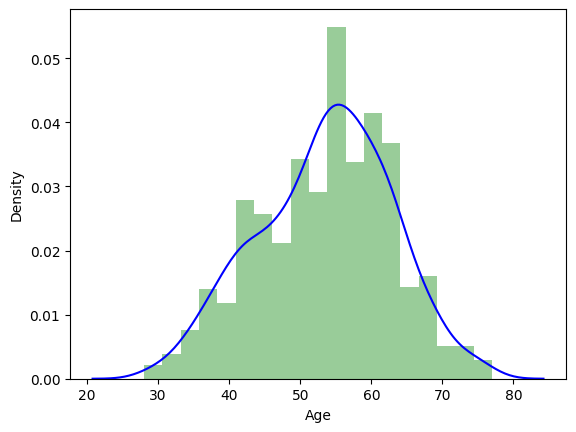

In [20]:
import seaborn as sns

#sns.histplot(dataset["RestingBP"],kde=True,color='green')
sns.distplot(dataset["Age"],kde=True,kde_kws={"color":"blue"},color='green')

## Finding PDF

In [21]:
# Finding PDF
from scipy.stats import norm

### calcualte the parameter for the norm
mean = dataset["Age"].mean()
std = dataset["Age"].std()

dist = norm(mean, std)
dist.pdf(55)

0.04177015522056406

## Finding CDF

In [22]:
#!pip install statsmodels

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF
CDF = ECDF(dataset["RestingBP"])
CDF(140)

0.7603485838779956

## Zscore - Normal distribution to Std Normanl Distribution

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_30557/2254886658.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zscore, kde=True)


<Axes: xlabel='Age', ylabel='Density'>

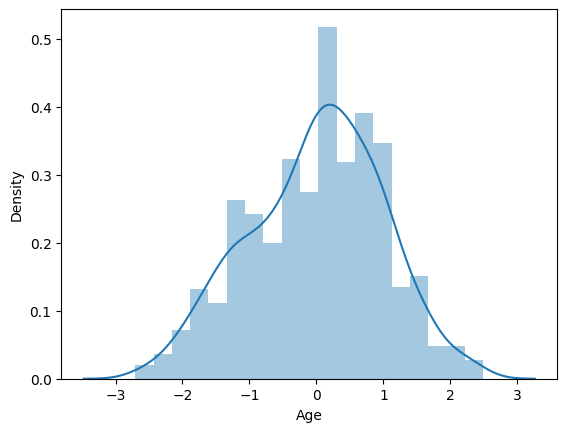

In [30]:
# Finding ZScore of a column...

from scipy.stats import zscore
zscore = zscore(dataset["Age"])
zscore

sns.distplot(zscore, kde=True)

## Finding Skewness (Measure of asymetry of the data distribution) 
#### Kurtosis...


In [24]:
quan_table= pd.DataFrame(index=["Mean","Median","Mode", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", 
                                   "1.5 Rule", "Lesser", "Greater","Max", "Skewness", "Kurtosis"],columns=quan)

for quan_columnName in quan_table.columns:
    quan_table.loc[ 'Mean', quan_columnName ]= dataset[quan_columnName].mean()
    quan_table.loc[ 'Median' , quan_columnName ] = dataset[quan_columnName].median()
    quan_table.loc[ 'Mode', quan_columnName ] = dataset[quan_columnName].mode()[0]   
    quan_table.loc[ "Min",quan_columnName ] = dataset[quan_columnName].min() 
    
    # getting the percentiles from dataset.describe table
    quan_table.loc[ "Q1:25%" , quan_columnName ] = dataset.describe()[quan_columnName]["25%"]
    quan_table.loc[ "Q2:50%" , quan_columnName ]= dataset.describe()[quan_columnName]["50%"]
    quan_table.loc[ "Q3:75%" , quan_columnName ]= dataset.describe()[quan_columnName]["75%"]
    quan_table.loc[ "Q4:100%" , quan_columnName ]= dataset[quan_columnName].max()

    # Finding IQR 
    quan_table.loc["IQR", quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ]- quan_table.loc[ "Q1:25%", quan_columnName ] 
    quan_table.loc["1.5 Rule", quan_columnName] = 1.5 * quan_table.loc["IQR", quan_columnName]
    quan_table.loc["Lesser" , quan_columnName] = quan_table.loc[ "Q1:25%" , quan_columnName ] - quan_table.loc["1.5 Rule", quan_columnName]
    quan_table.loc["Greater",quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ] + quan_table.loc["1.5 Rule", quan_columnName]

    quan_table.loc["Max",quan_columnName] = dataset[quan_columnName].max()
    
    # Finding Skewness and Kurtosis
    quan_table.loc["Skewness", quan_columnName] = dataset[quan_columnName].skew()
    quan_table.loc["Kurtosis", quan_columnName] = dataset[quan_columnName].kurtosis()

quan_table

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Mean,53.510893,132.125272,203.985158,0.0,136.819172,0.877778,0.553377
Median,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Mode,54,120,32.625,0,150,0.0,1
Min,28,90,32.625,0,66,-2.25,0
Q1:25%,47.0,120.0,173.25,0.0,120.0,0.0,0.0
Q2:50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Q3:75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
Q4:100%,77,170,407.625,0,202,3.75,1
IQR,13.0,20.0,93.75,0.0,36.0,1.5,1.0
1.5 Rule,19.5,30.0,140.625,0.0,54.0,2.25,1.5


## Variance and Standard deviation...

In [25]:
quan_table= pd.DataFrame(index=["Mean","Median","Mode", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", 
                                   "1.5 Rule", "Lesser", "Greater","Max", "Skewness", "Kurtosis","Variance", "Std"],columns=quan)

for quan_columnName in quan_table.columns:
    quan_table.loc[ 'Mean', quan_columnName ]= dataset[quan_columnName].mean()
    quan_table.loc[ 'Median' , quan_columnName ] = dataset[quan_columnName].median()
    quan_table.loc[ 'Mode', quan_columnName ] = dataset[quan_columnName].mode()[0]   
    quan_table.loc[ "Min",quan_columnName ] = dataset[quan_columnName].min() 
    
    # getting the percentiles from dataset.describe table
    quan_table.loc[ "Q1:25%" , quan_columnName ] = dataset.describe()[quan_columnName]["25%"]
    quan_table.loc[ "Q2:50%" , quan_columnName ]= dataset.describe()[quan_columnName]["50%"]
    quan_table.loc[ "Q3:75%" , quan_columnName ]= dataset.describe()[quan_columnName]["75%"]
    quan_table.loc[ "Q4:100%" , quan_columnName ]= dataset[quan_columnName].max()

    # Finding IQR 
    quan_table.loc["IQR", quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ]- quan_table.loc[ "Q1:25%", quan_columnName ] 
    quan_table.loc["1.5 Rule", quan_columnName] = 1.5 * quan_table.loc["IQR", quan_columnName]
    quan_table.loc["Lesser" , quan_columnName] = quan_table.loc[ "Q1:25%" , quan_columnName ] - quan_table.loc["1.5 Rule", quan_columnName]
    quan_table.loc["Greater",quan_columnName] = quan_table.loc[ "Q3:75%" , quan_columnName ] + quan_table.loc["1.5 Rule", quan_columnName]

    quan_table.loc["Max",quan_columnName] = dataset[quan_columnName].max()
    
    # Finding Skewness and Kurtosis
    quan_table.loc["Skewness", quan_columnName] = dataset[quan_columnName].skew()
    quan_table.loc["Kurtosis", quan_columnName] = dataset[quan_columnName].kurtosis()

    # Finding Variance and Std Deviation
    quan_table.loc["Variance", quan_columnName] = dataset[quan_columnName].var()
    quan_table.loc["Std", quan_columnName] = dataset[quan_columnName].std()

quan_table

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Mean,53.510893,132.125272,203.985158,0.0,136.819172,0.877778,0.553377
Median,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Mode,54,120,32.625,0,150,0.0,1
Min,28,90,32.625,0,66,-2.25,0
Q1:25%,47.0,120.0,173.25,0.0,120.0,0.0,0.0
Q2:50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
Q3:75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
Q4:100%,77,170,407.625,0,202,3.75,1
IQR,13.0,20.0,93.75,0.0,36.0,1.5,1.0
1.5 Rule,19.5,30.0,140.625,0.0,54.0,2.25,1.5
